In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/datasets/quadeer15sh/celeba-face-recognition-triplets/data'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mrunaldivekar2525
Your Kaggle Key: ··········


100%|██████████| 231M/231M [00:01<00:00, 181MB/s]


In [3]:
import numpy as np
import pandas as pd
import os
import re
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Input, Layer
from tensorflow.keras.layers import BatchNormalization, Conv2DTranspose, LeakyReLU, Reshape, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

init_notebook_mode(connected=True)

# What are GANs ?

<div class='alert alert-success'><strong>Generative Adversarial Networks, or GANs for short, are an approach to generative modeling using deep learning methods, such as convolutional neural networks.</strong></div>

- Generative modeling is an unsupervised learning task in machine learning that involves automatically discovering and learning the regularities or patterns in input data in such a way that the model can be used to generate or output new examples that plausibly could have been drawn from the original dataset.



In [7]:
img_size = 64
batch_size = 64

def scaling(x):
    x = (x-127.5)/127.5
    return x


datagen = ImageDataGenerator(preprocessing_function=scaling)

data_generator = datagen.flow_from_directory(directory='/content/celeba-face-recognition-triplets/CelebA FR Triplets/CelebA FR Triplets',
                                        target_size=(img_size,img_size),
                                        class_mode=None,
                                        batch_size=batch_size,
                                        classes=['images'],
                                        shuffle=True)

samples = data_generator.samples

Found 46371 images belonging to 1 classes.


# Visualization of Images

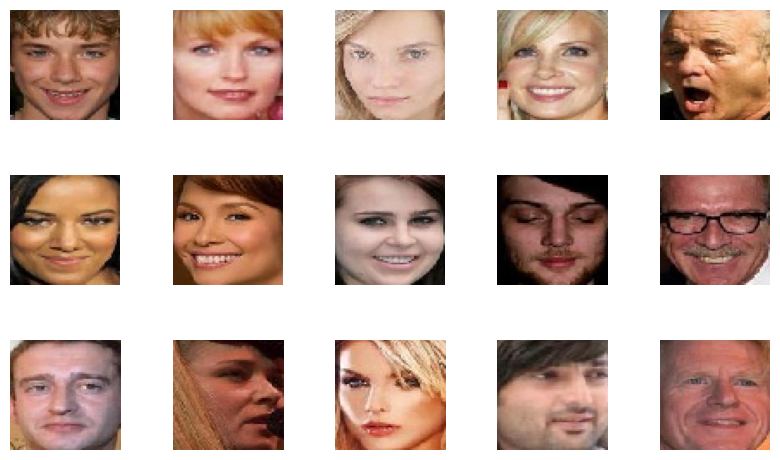

In [8]:
images = data_generator.__next__()

plt.figure(figsize = (10 , 10))
for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    plt.imshow((images[i]+1)/2)
    plt.axis('off')

# DC-GANS Architecture



## Discriminator


In [9]:
discriminator = Sequential(
    [
        Input(shape=(64, 64, 3)),
        Conv2D(32, kernel_size=5, strides=2, padding="same"),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),
        Conv2D(64, kernel_size=5, strides=2, padding="same"),
        BatchNormalization(),
        LeakyReLU(0.2),
        Conv2D(128, kernel_size=5, strides=2, padding="same"),
        BatchNormalization(),
        LeakyReLU(0.2),
        Conv2D(256, kernel_size=5, strides=2, padding="same"),
        BatchNormalization(),
        LeakyReLU(0.2),
        Conv2D(256, kernel_size=5, strides=2, padding="same"),
        BatchNormalization(),
        LeakyReLU(0.2),
        Flatten(),
        Dropout(0.4),
        Dense(1, activation="sigmoid"),
    ],
    name="discriminator",
)
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 64)        256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 64)      

## Generator

In [10]:
latent_dim = 256
generator = Sequential(
    [
        Input(shape=(latent_dim,)),
        Dense(4 * 4 * 256),
        Reshape((4, 4, 256)),
        Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),
        Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),
        Conv2DTranspose(64, kernel_size=4, strides=2, padding="same"),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),
        Conv2DTranspose(64, kernel_size=4, strides=2, padding="same"),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),
        Conv2D(3, kernel_size=5, padding="same", activation="tanh"),
    ],
    name="generator",
)
generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 4096)              1052672   
                                                                 
 reshape (Reshape)           (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 8, 8, 256)         1048832   
 anspose)                                                        
                                                                 
 batch_normalization_5 (Bat  (None, 8, 8, 256)         1024      
 chNormalization)                                                
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 16, 16, 128)       52

# GAN Training !



Epoch:  0


100%|██████████| 725/725 [02:41<00:00,  4.48it/s]


Epoch: 0 Generator Loss: 2.4219605922698975 Discriminator Loss: 0.39768657088279724


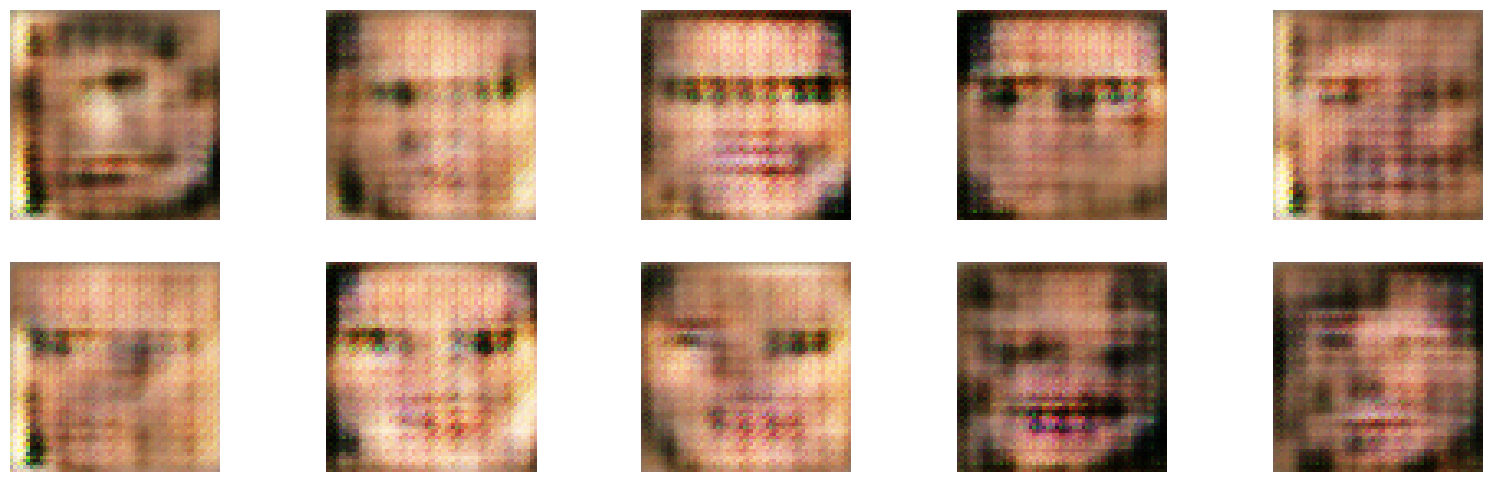

Epoch:  1


100%|██████████| 725/725 [02:19<00:00,  5.20it/s]


Epoch: 1 Generator Loss: 2.125096321105957 Discriminator Loss: 0.4374023973941803
Epoch:  2


100%|██████████| 725/725 [02:14<00:00,  5.40it/s]


Epoch: 2 Generator Loss: 2.0520575046539307 Discriminator Loss: 0.4491862952709198
Epoch:  3


100%|██████████| 725/725 [02:14<00:00,  5.39it/s]


Epoch: 3 Generator Loss: 2.0132079124450684 Discriminator Loss: 0.45443010330200195
Epoch:  4


100%|██████████| 725/725 [02:15<00:00,  5.36it/s]


Epoch: 4 Generator Loss: 1.965052843093872 Discriminator Loss: 0.46289700269699097
Epoch:  5


100%|██████████| 725/725 [02:14<00:00,  5.39it/s]


Epoch: 5 Generator Loss: 1.9164726734161377 Discriminator Loss: 0.47175881266593933


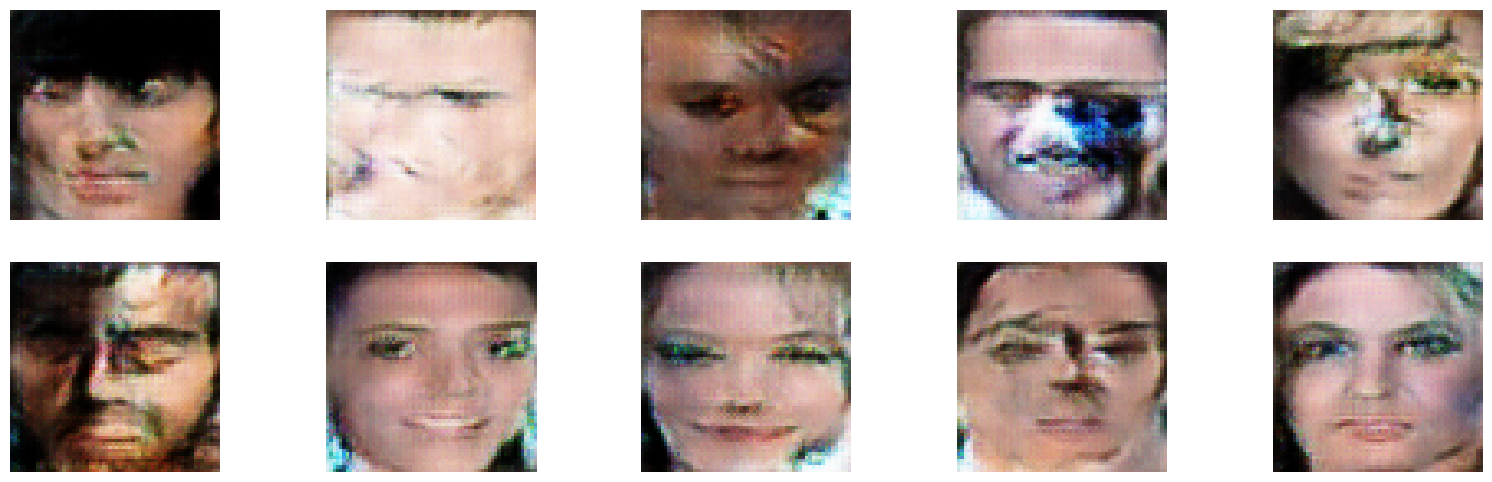

Epoch:  6


100%|██████████| 725/725 [02:14<00:00,  5.40it/s]


Epoch: 6 Generator Loss: 1.8742483854293823 Discriminator Loss: 0.4792368412017822
Epoch:  7


100%|██████████| 725/725 [02:14<00:00,  5.39it/s]


Epoch: 7 Generator Loss: 1.8391419649124146 Discriminator Loss: 0.4852997064590454
Epoch:  8


100%|██████████| 725/725 [02:15<00:00,  5.36it/s]


Epoch: 8 Generator Loss: 1.8153847455978394 Discriminator Loss: 0.48927462100982666
Epoch:  9


100%|██████████| 725/725 [02:15<00:00,  5.35it/s]


Epoch: 9 Generator Loss: 1.7934733629226685 Discriminator Loss: 0.49272143840789795
Epoch:  10


100%|██████████| 725/725 [02:15<00:00,  5.36it/s]


Epoch: 10 Generator Loss: 1.7753400802612305 Discriminator Loss: 0.49544423818588257


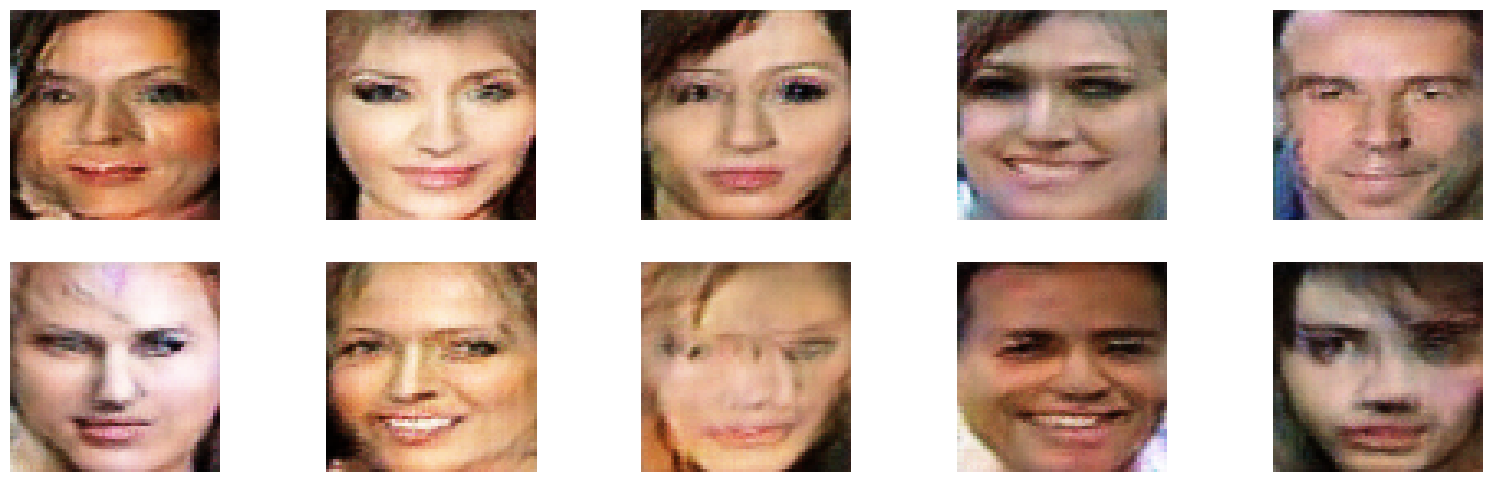

Epoch:  11


100%|██████████| 725/725 [02:15<00:00,  5.34it/s]


Epoch: 11 Generator Loss: 1.7613513469696045 Discriminator Loss: 0.49745261669158936
Epoch:  12


100%|██████████| 725/725 [02:15<00:00,  5.35it/s]


Epoch: 12 Generator Loss: 1.750408411026001 Discriminator Loss: 0.49866944551467896
Epoch:  13


100%|██████████| 725/725 [02:16<00:00,  5.31it/s]


Epoch: 13 Generator Loss: 1.742352843284607 Discriminator Loss: 0.4994467794895172
Epoch:  14


100%|██████████| 725/725 [02:15<00:00,  5.34it/s]


Epoch: 14 Generator Loss: 1.7366352081298828 Discriminator Loss: 0.49977734684944153
Epoch:  15


100%|██████████| 725/725 [02:16<00:00,  5.32it/s]


Epoch: 15 Generator Loss: 1.7337398529052734 Discriminator Loss: 0.49944886565208435


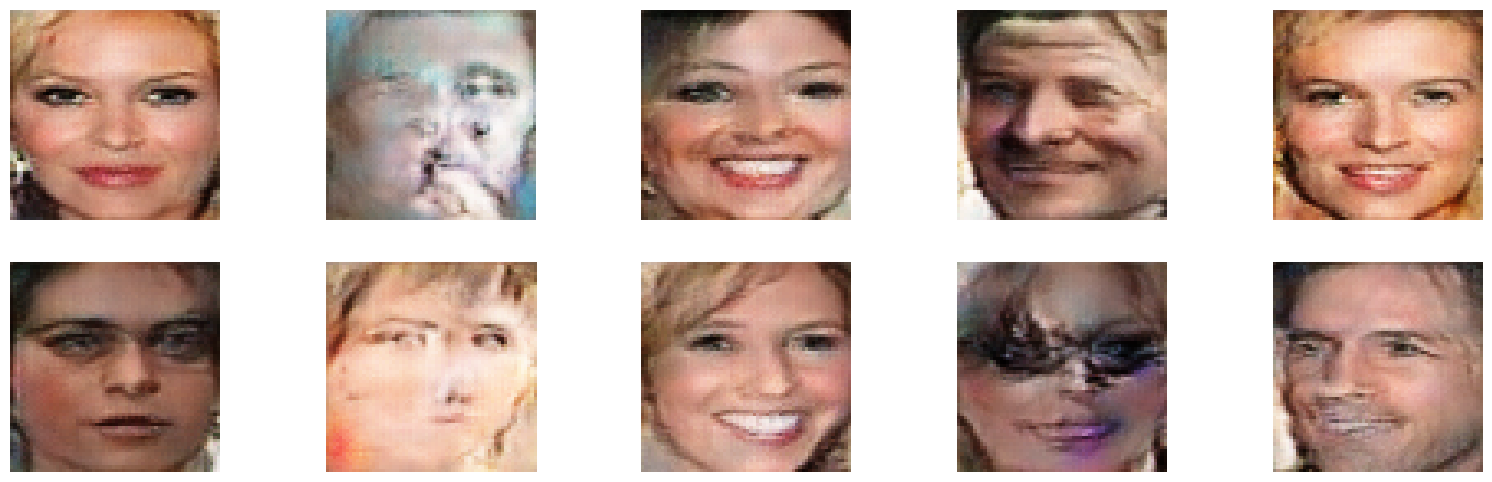

Epoch:  16


100%|██████████| 725/725 [02:17<00:00,  5.27it/s]


Epoch: 16 Generator Loss: 1.7334281206130981 Discriminator Loss: 0.4986516833305359
Epoch:  17


100%|██████████| 725/725 [02:16<00:00,  5.32it/s]


Epoch: 17 Generator Loss: 1.7340632677078247 Discriminator Loss: 0.4975752532482147
Epoch:  18


100%|██████████| 725/725 [02:17<00:00,  5.29it/s]


Epoch: 18 Generator Loss: 1.7324849367141724 Discriminator Loss: 0.4970526099205017
Epoch:  19


100%|██████████| 725/725 [02:17<00:00,  5.28it/s]


Epoch: 19 Generator Loss: 1.7346863746643066 Discriminator Loss: 0.4955956041812897
Epoch:  20


100%|██████████| 725/725 [02:16<00:00,  5.31it/s]


Epoch: 20 Generator Loss: 1.7382824420928955 Discriminator Loss: 0.4939118027687073


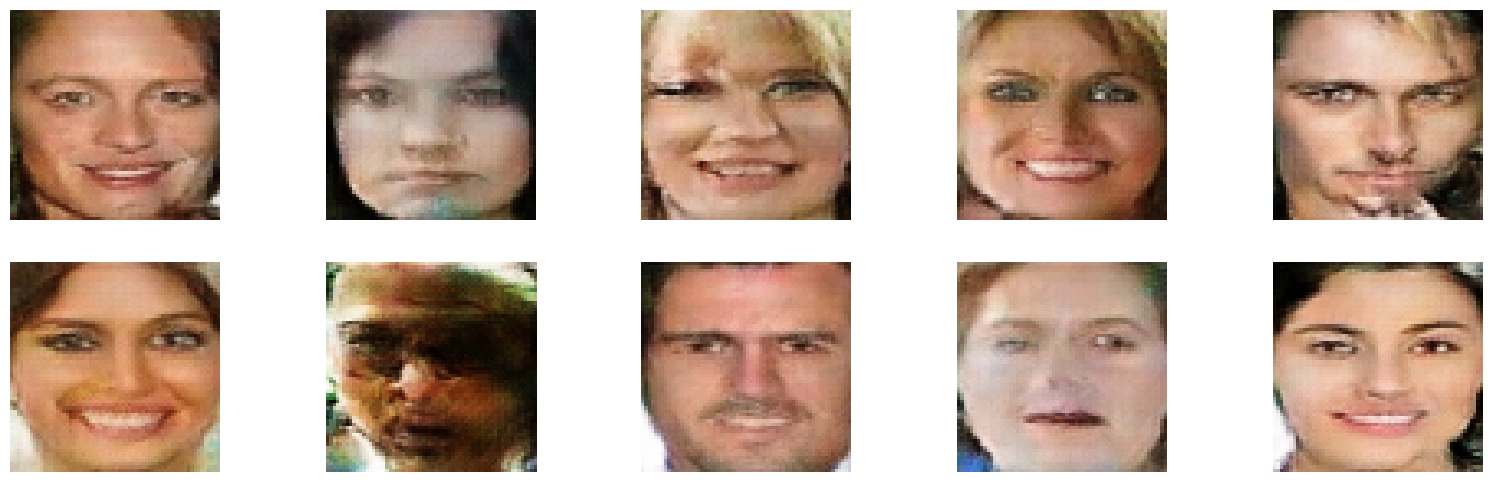

Epoch:  21


100%|██████████| 725/725 [02:16<00:00,  5.31it/s]


Epoch: 21 Generator Loss: 1.743187665939331 Discriminator Loss: 0.4921741485595703
Epoch:  22


100%|██████████| 725/725 [02:16<00:00,  5.31it/s]


Epoch: 22 Generator Loss: 1.747928261756897 Discriminator Loss: 0.4903913140296936
Epoch:  23


100%|██████████| 725/725 [02:18<00:00,  5.23it/s]


Epoch: 23 Generator Loss: 1.7531826496124268 Discriminator Loss: 0.4887257516384125
Epoch:  24


100%|██████████| 725/725 [02:18<00:00,  5.25it/s]


Epoch: 24 Generator Loss: 1.7600847482681274 Discriminator Loss: 0.4865812063217163
Epoch:  25


100%|██████████| 725/725 [02:20<00:00,  5.17it/s]


Epoch: 25 Generator Loss: 1.7678264379501343 Discriminator Loss: 0.48444706201553345


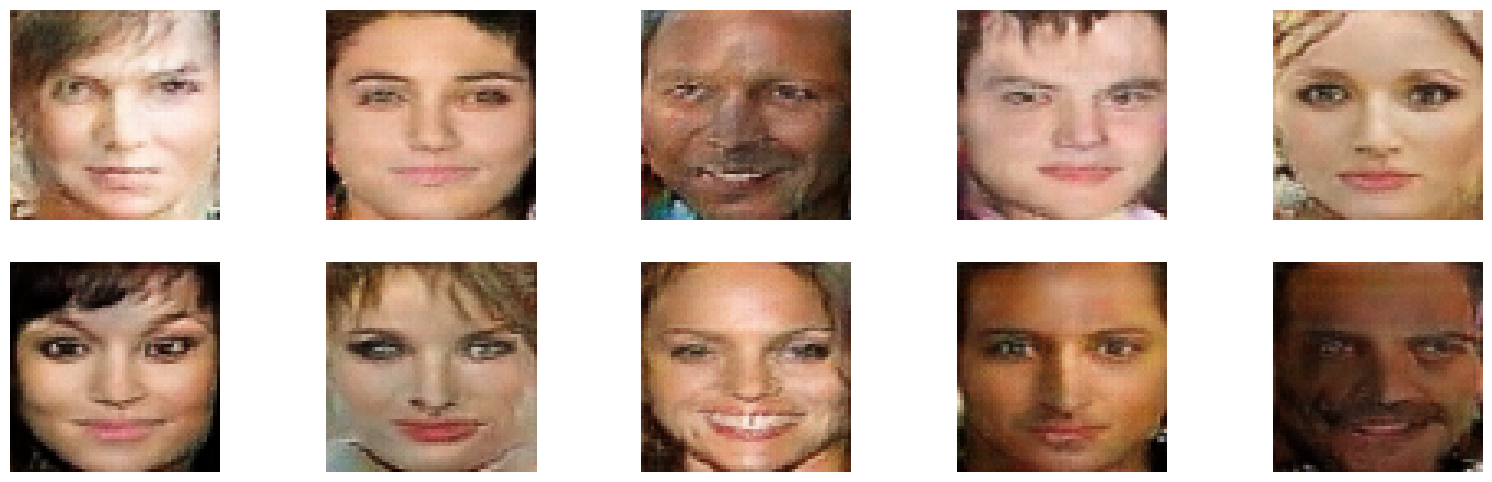

Epoch:  26


100%|██████████| 725/725 [02:17<00:00,  5.27it/s]


Epoch: 26 Generator Loss: 1.7768851518630981 Discriminator Loss: 0.4822009205818176
Epoch:  27


100%|██████████| 725/725 [02:17<00:00,  5.27it/s]


Epoch: 27 Generator Loss: 1.7864965200424194 Discriminator Loss: 0.4798295497894287
Epoch:  28


100%|██████████| 725/725 [02:18<00:00,  5.22it/s]


Epoch: 28 Generator Loss: 1.7965526580810547 Discriminator Loss: 0.47734105587005615
Epoch:  29


100%|██████████| 725/725 [02:17<00:00,  5.28it/s]


Epoch: 29 Generator Loss: 1.8076924085617065 Discriminator Loss: 0.4752083718776703
Epoch:  30


100%|██████████| 725/725 [02:18<00:00,  5.22it/s]


Epoch: 30 Generator Loss: 1.8185577392578125 Discriminator Loss: 0.47257134318351746


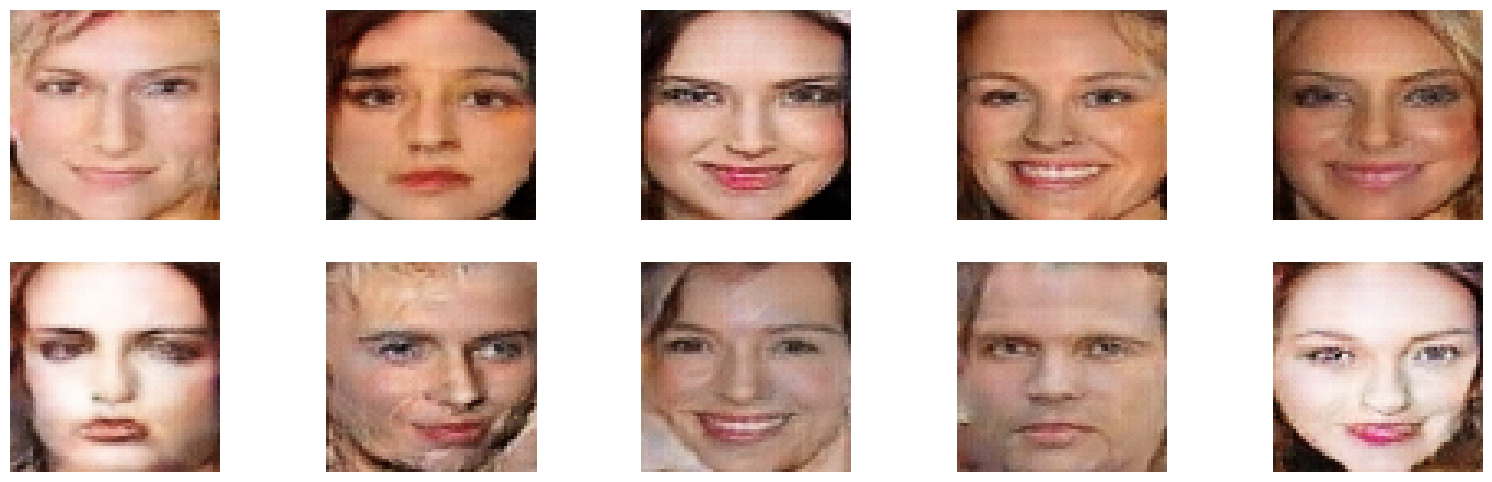

Epoch:  31


100%|██████████| 725/725 [02:17<00:00,  5.26it/s]


Epoch: 31 Generator Loss: 1.832102656364441 Discriminator Loss: 0.46973124146461487
Epoch:  32


100%|██████████| 725/725 [02:17<00:00,  5.28it/s]


Epoch: 32 Generator Loss: 1.8465906381607056 Discriminator Loss: 0.46679699420928955
Epoch:  33


100%|██████████| 725/725 [02:17<00:00,  5.29it/s]


Epoch: 33 Generator Loss: 1.8621513843536377 Discriminator Loss: 0.4637830853462219
Epoch:  34


100%|██████████| 725/725 [02:18<00:00,  5.22it/s]


Epoch: 34 Generator Loss: 1.8777955770492554 Discriminator Loss: 0.4607899785041809
Epoch:  35


100%|██████████| 725/725 [02:17<00:00,  5.25it/s]


Epoch: 35 Generator Loss: 1.8943310976028442 Discriminator Loss: 0.4576265811920166


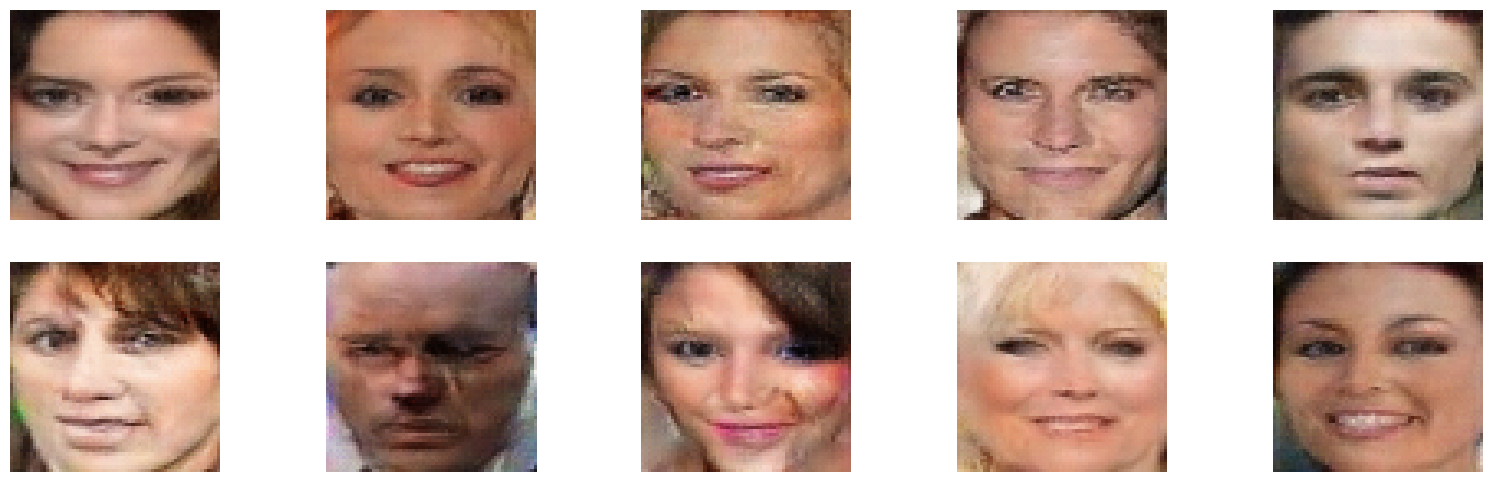

Epoch:  36


100%|██████████| 725/725 [02:20<00:00,  5.17it/s]


Epoch: 36 Generator Loss: 1.9116191864013672 Discriminator Loss: 0.45455750823020935
Epoch:  37


100%|██████████| 725/725 [02:20<00:00,  5.18it/s]


Epoch: 37 Generator Loss: 1.928694248199463 Discriminator Loss: 0.4515031576156616
Epoch:  38


100%|██████████| 725/725 [02:19<00:00,  5.18it/s]


Epoch: 38 Generator Loss: 1.947672963142395 Discriminator Loss: 0.4482031464576721
Epoch:  39


100%|██████████| 725/725 [02:18<00:00,  5.22it/s]


Epoch: 39 Generator Loss: 1.967132806777954 Discriminator Loss: 0.44500967860221863
Epoch:  40


100%|██████████| 725/725 [02:19<00:00,  5.19it/s]


Epoch: 40 Generator Loss: 1.9879847764968872 Discriminator Loss: 0.44158822298049927


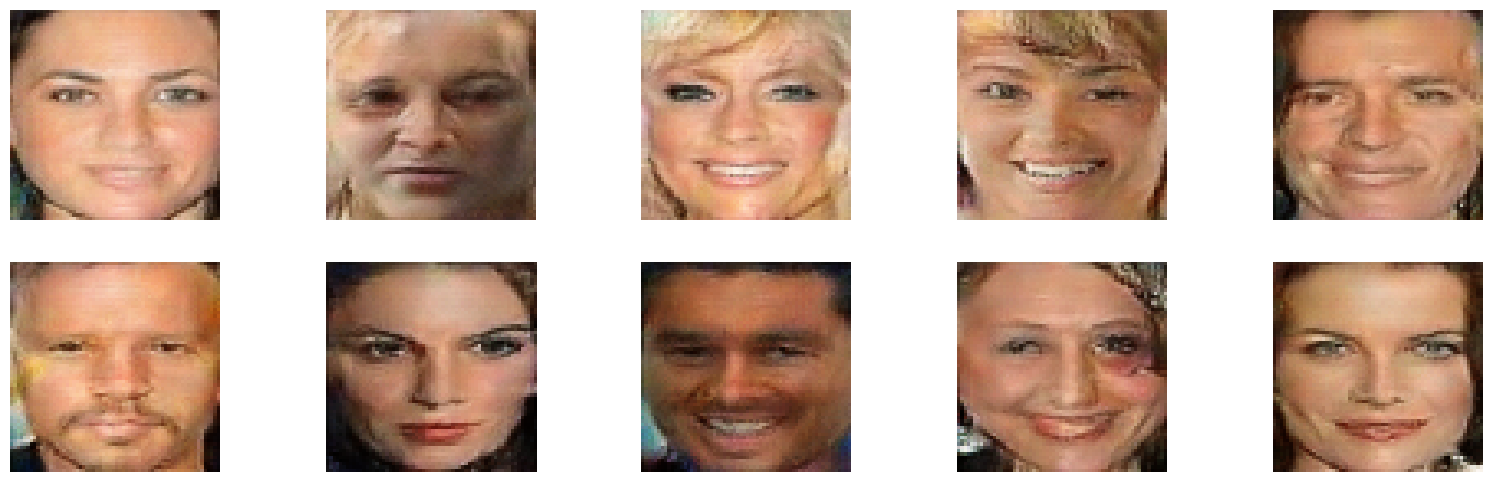

Epoch:  41


100%|██████████| 725/725 [02:20<00:00,  5.16it/s]


Epoch: 41 Generator Loss: 2.0092933177948 Discriminator Loss: 0.4382702112197876
Epoch:  42


100%|██████████| 725/725 [02:20<00:00,  5.16it/s]


Epoch: 42 Generator Loss: 2.031372308731079 Discriminator Loss: 0.43484213948249817
Epoch:  43


100%|██████████| 725/725 [02:20<00:00,  5.17it/s]


Epoch: 43 Generator Loss: 2.053743600845337 Discriminator Loss: 0.43147268891334534
Epoch:  44


100%|██████████| 725/725 [02:20<00:00,  5.17it/s]


Epoch: 44 Generator Loss: 2.075664758682251 Discriminator Loss: 0.42810308933258057
Epoch:  45


100%|██████████| 725/725 [02:20<00:00,  5.15it/s]


Epoch: 45 Generator Loss: 2.1000359058380127 Discriminator Loss: 0.42451563477516174


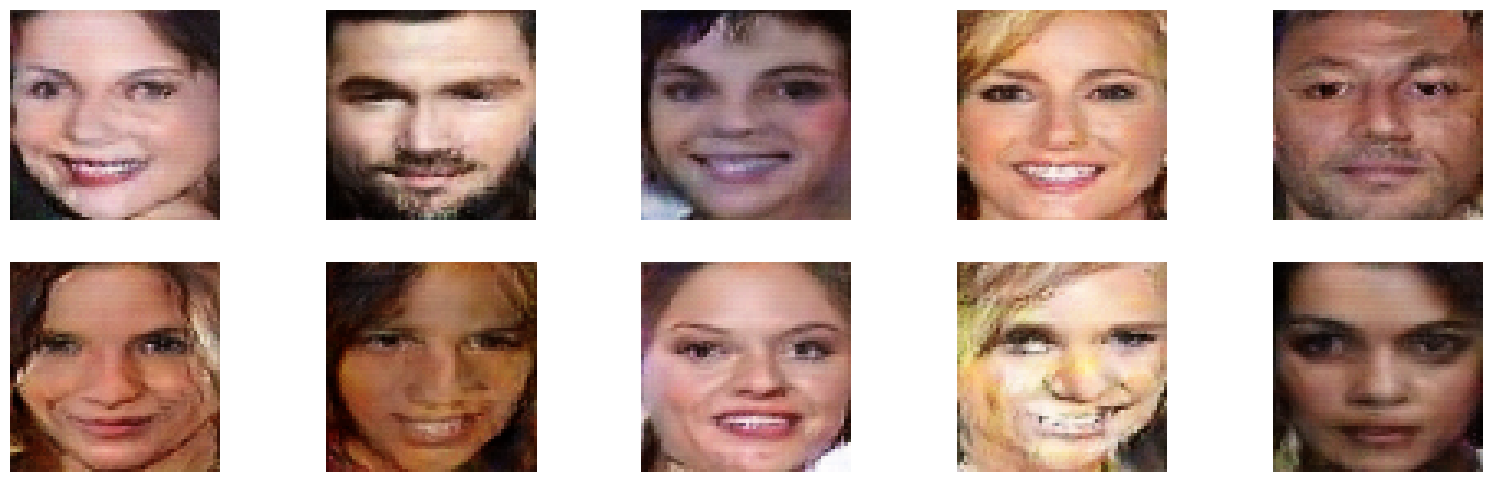

Epoch:  46


100%|██████████| 725/725 [02:20<00:00,  5.16it/s]


Epoch: 46 Generator Loss: 2.1254308223724365 Discriminator Loss: 0.421003520488739
Epoch:  47


100%|██████████| 725/725 [02:20<00:00,  5.17it/s]


Epoch: 47 Generator Loss: 2.150766372680664 Discriminator Loss: 0.4174213111400604
Epoch:  48


100%|██████████| 725/725 [02:20<00:00,  5.17it/s]


Epoch: 48 Generator Loss: 2.1770501136779785 Discriminator Loss: 0.4138966500759125
Epoch:  49


100%|██████████| 725/725 [02:22<00:00,  5.10it/s]


Epoch: 49 Generator Loss: 2.203554630279541 Discriminator Loss: 0.41036778688430786
Epoch:  50


100%|██████████| 725/725 [02:23<00:00,  5.05it/s]


Epoch: 50 Generator Loss: 2.2306137084960938 Discriminator Loss: 0.40688714385032654


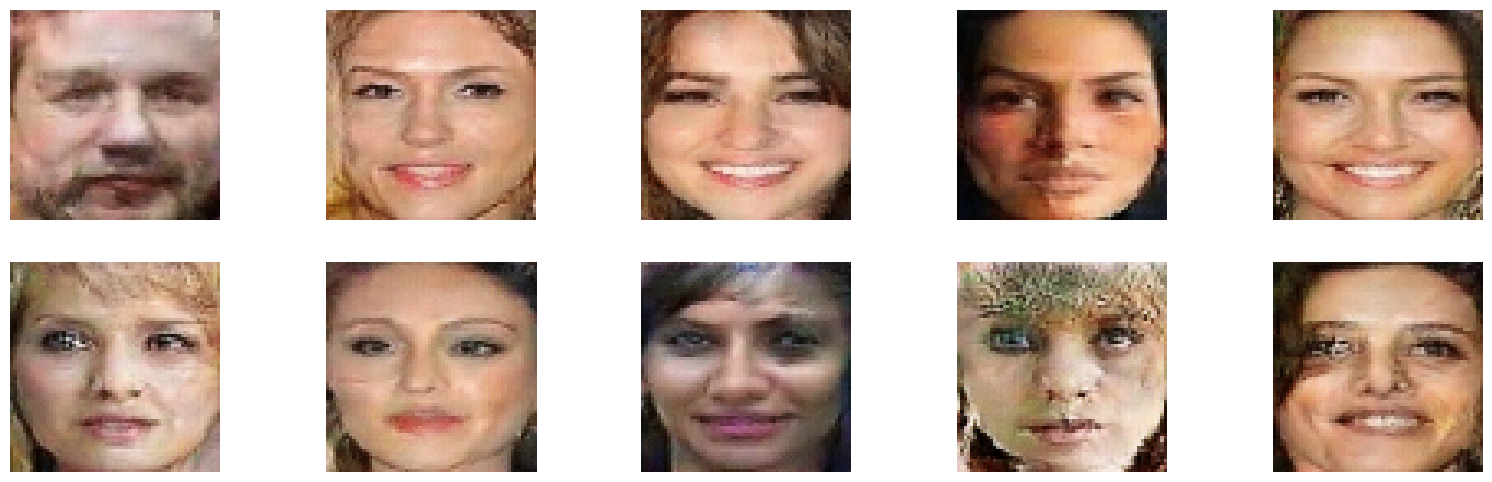

In [11]:
gen_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
dis_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
loss_fn = tf.keras.losses.BinaryCrossentropy()
epochs=50
steps_per_epoch = int(-(samples/-batch_size))

disc_losses = []
gen_losses = []

for epoch in range(epochs+1):
    print("Epoch: ",epoch)
    for idx, (real) in enumerate(tqdm(data_generator)):
        if idx > steps_per_epoch:
            break

        batch_size = real.shape[0]
        random_latent_vectors = tf.random.normal(shape = (batch_size, latent_dim))
        fake = generator(random_latent_vectors)

        with tf.GradientTape() as d_tape:
            loss_disc_real = loss_fn(tf.ones((batch_size, 1)), discriminator(real))
            loss_disc_fake = loss_fn(tf.zeros((batch_size, 1)), discriminator(fake))
            loss_disc = (loss_disc_real + loss_disc_fake)/2
            disc_losses.append(loss_disc)

        grads = d_tape.gradient(loss_disc, discriminator.trainable_weights)
        dis_optimizer.apply_gradients(zip(grads, discriminator.trainable_weights))

        with tf.GradientTape() as g_tape:
            fake = generator(random_latent_vectors)
            output = discriminator(fake)
            loss_gen = loss_fn(tf.ones(batch_size, 1), output)
            gen_losses.append(loss_gen)

        grads = g_tape.gradient(loss_gen, generator.trainable_weights)
        gen_optimizer.apply_gradients(zip(grads, generator.trainable_weights))

    mean_disc_loss = sum(disc_losses)/len(disc_losses)
    mean_gen_loss = sum(gen_losses)/len(gen_losses)

    print(f"Epoch: {epoch} Generator Loss: {mean_gen_loss} Discriminator Loss: {mean_disc_loss}")
    data_generator.on_epoch_end()

    if epoch % 5 == 0:
        random_latent_vectors = tf.random.normal(shape = (10, latent_dim))
        fake = generator(random_latent_vectors)
        generated_images = fake.numpy()
        plt.figure(figsize = (20 , 6))
        for i in range(10):
            plt.subplot(2 , 5, i+1)
            plt.subplots_adjust(hspace = 0.2 , wspace = 0.1)
            image = generated_images[i]
            plt.imshow((image+1)/2)
            plt.axis('off')
        plt.show()

In [12]:
import matplotlib.pyplot as plt

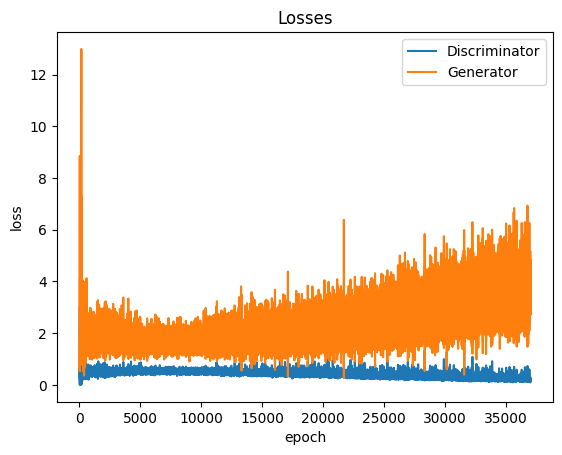

In [13]:
plt.plot(disc_losses, '-')
plt.plot(gen_losses, '-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Discriminator', 'Generator'])
plt.title('Losses');

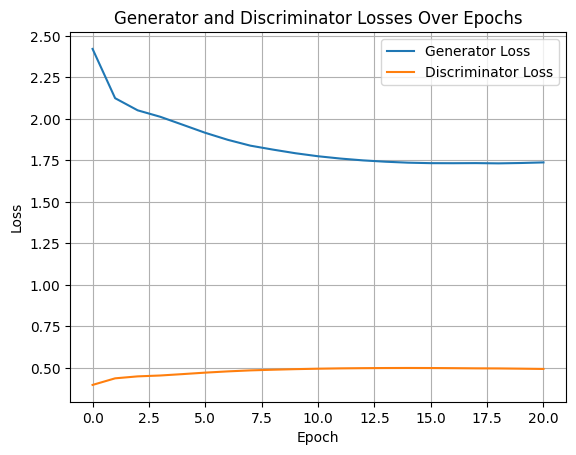

In [14]:
import matplotlib.pyplot as plt

# Output data
generator_losses = [2.4219605922698975, 2.125096321105957, 2.0520575046539307, 2.0132079124450684, 1.965052843093872, 1.9164726734161377, 1.8742483854293823, 1.8391419649124146, 1.8153847455978394, 1.7934733629226685, 1.7753400802612305, 1.7613513469696045, 1.750408411026001, 1.742352843284607, 1.7366352081298828, 1.7337398529052734, 1.7334281206130981, 1.7340632677078247, 1.7324849367141724, 1.7346863746643066, 1.7382824420928955]
discriminator_losses = [0.39768657088279724, 0.4374023973941803, 0.4491862952709198, 0.45443010330200195, 0.46289700269699097, 0.47175881266593933, 0.4792368412017822, 0.4852997064590454, 0.48927462100982666, 0.49272143840789795, 0.49544423818588257, 0.49745261669158936, 0.49866944551467896, 0.4994467794895172, 0.49977734684944153, 0.49944886565208435, 0.4986516833305359, 0.4975752532482147, 0.4970526099205017, 0.4955956041812897, 0.4939118027687073]

# Plotting the generator and discriminator losses
plt.plot(range(len(generator_losses)), generator_losses, label='Generator Loss')
plt.plot(range(len(discriminator_losses)), discriminator_losses, label='Discriminator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Generator and Discriminator Losses Over Epochs')
plt.legend()
plt.grid(True)
plt.show()



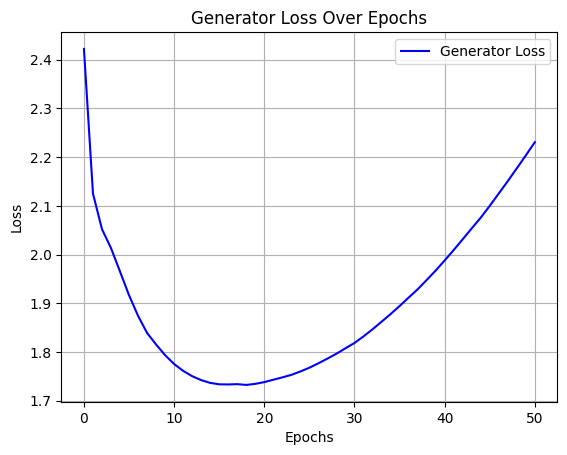

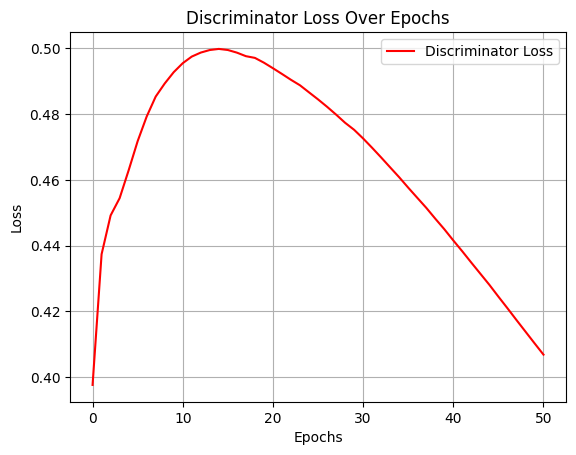

In [15]:
import matplotlib.pyplot as plt

# Output data
epochs = list(range(51))
generator_losses = [2.4219605922698975, 2.125096321105957, 2.0520575046539307, 2.0132079124450684, 1.965052843093872, 1.9164726734161377, 1.8742483854293823, 1.8391419649124146, 1.8153847455978394, 1.7934733629226685, 1.7753400802612305, 1.7613513469696045, 1.750408411026001, 1.742352843284607, 1.7366352081298828, 1.7337398529052734, 1.7334281206130981, 1.7340632677078247, 1.7324849367141724, 1.7346863746643066, 1.7382824420928955, 1.743187665939331, 1.747928261756897, 1.7531826496124268, 1.7600847482681274, 1.7678264379501343, 1.7768851518630981, 1.7864965200424194, 1.7965526580810547, 1.8076924085617065, 1.8185577392578125, 1.832102656364441, 1.8465906381607056, 1.8621513843536377, 1.8777955770492554, 1.8943310976028442, 1.9116191864013672, 1.928694248199463, 1.947672963142395, 1.967132806777954, 1.9879847764968872, 2.0092933177948, 2.031372308731079, 2.053743600845337, 2.075664758682251, 2.1000359058380127, 2.1254308223724365, 2.150766372680664, 2.1770501136779785, 2.203554630279541, 2.2306137084960938]
discriminator_losses = [0.39768657088279724, 0.4374023973941803, 0.4491862952709198, 0.45443010330200195, 0.46289700269699097, 0.47175881266593933, 0.4792368412017822, 0.4852997064590454, 0.48927462100982666, 0.49272143840789795, 0.49544423818588257, 0.49745261669158936, 0.49866944551467896, 0.4994467794895172, 0.49977734684944153, 0.49944886565208435, 0.4986516833305359, 0.4975752532482147, 0.4970526099205017, 0.4955956041812897, 0.4939118027687073, 0.4921741485595703, 0.4903913140296936, 0.4887257516384125, 0.4865812063217163, 0.48444706201553345, 0.4822009205818176, 0.4798295497894287, 0.47734105587005615, 0.4752083718776703, 0.47257134318351746, 0.46973124146461487, 0.46679699420928955, 0.4637830853462219, 0.4607899785041809, 0.4576265811920166, 0.45455750823020935, 0.4515031576156616, 0.4482031464576721, 0.44500967860221863, 0.44158822298049927, 0.4382702112197876, 0.43484213948249817, 0.43147268891334534, 0.42810308933258057, 0.42451563477516174, 0.421003520488739, 0.4174213111400604, 0.4138966500759125, 0.41036778688430786, 0.40688714385032654]

# Plotting the generator loss
plt.plot(epochs, generator_losses, label='Generator Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Generator Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the discriminator loss
plt.plot(epochs, discriminator_losses, label='Discriminator Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Discriminator Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


1/1 [==============================] - 0s 500ms/step


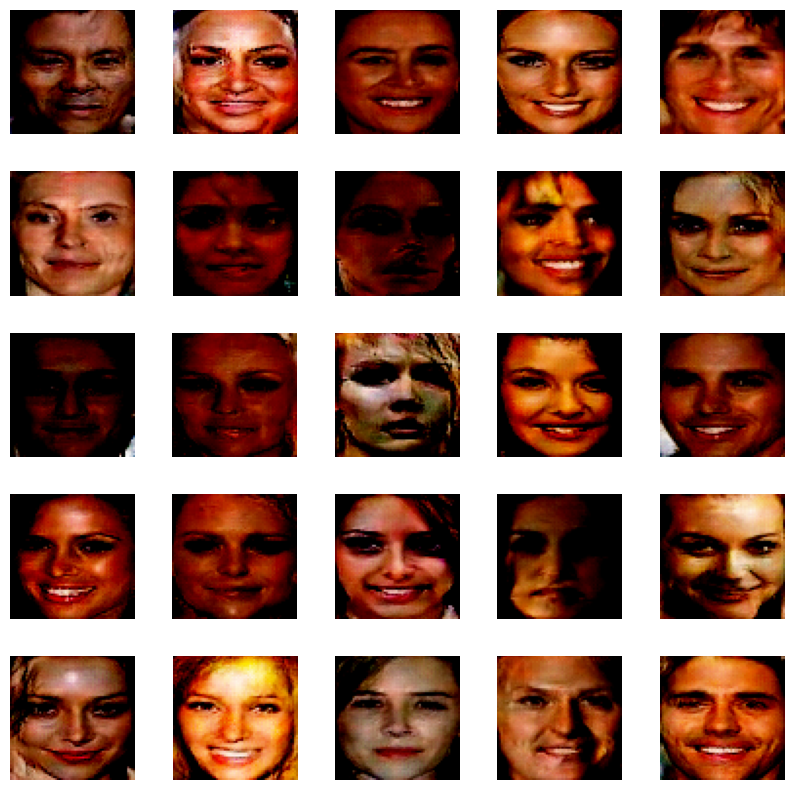

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def plot_generated_images(generator, num_images=25, latent_dim=256):
    # Generate random noise as input to the generator
    noise = np.random.randn(num_images, latent_dim)

    # Generate images from the random noise
    generated_images = generator.predict(noise)

    # Plot the generated images in a grid
    fig, axs = plt.subplots(int(np.sqrt(num_images)), int(np.sqrt(num_images)), figsize=(10, 10))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for i in range(num_images):
        ax = axs[i // int(np.sqrt(num_images)), i % int(np.sqrt(num_images))]
        ax.imshow(generated_images[i])
        ax.axis('off')
    plt.show()

# Example usage
# Assuming `generator` is your trained generator model
plot_generated_images(generator)


1/1 [==============================] - 0s 30ms/step


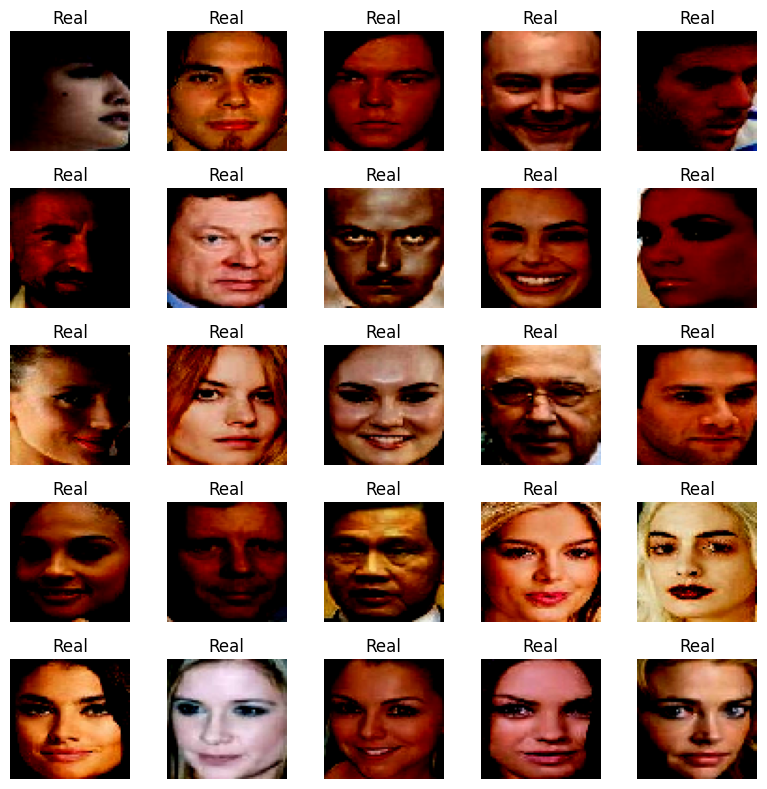

In [26]:
# Define a function to plot real vs. fake images
def plot_real_vs_fake_images(generator, real_images, num_images=25, latent_dim=256):
    # Generate fake images using the generator
    noise = np.random.normal(0, 1, (num_images, latent_dim))
    fake_images = generator.predict(noise)

    # Plot real vs. fake images
    fig, axs = plt.subplots(int(np.sqrt(num_images)), int(np.sqrt(num_images)), figsize=(8, 8))
    for i in range(num_images):
        ax = axs[i // int(np.sqrt(num_images)), i % int(np.sqrt(num_images))]
        ax.imshow(fake_images[i])
        ax.set_title('Fake')
        ax.axis('off')
        if i < len(real_images):
            ax = axs[i // int(np.sqrt(num_images)), i % int(np.sqrt(num_images))]
            ax.imshow(real_images[i])
            ax.set_title('Real')
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# Load a batch of real images
real_images_batch = next(data_generator)

# Plot real vs. fake images
plot_real_vs_fake_images(generator, real_images_batch)

1/1 [==============================] - 0s 21ms/step


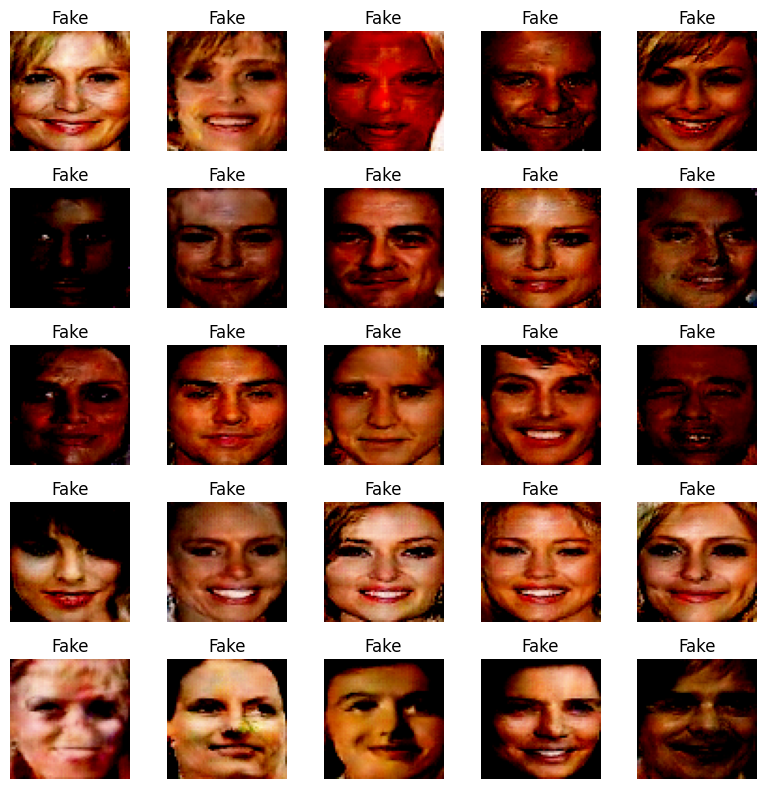

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def plot_real_vs_fake_images(generator, real_images, num_images=25, latent_dim=256):
    # Generate fake images using the generator
    noise = np.random.normal(0, 1, (num_images, latent_dim))
    fake_images = generator.predict(noise)

    # Plot real vs. fake images
    fig, axs = plt.subplots(int(np.sqrt(num_images)), int(np.sqrt(num_images)), figsize=(8, 8))
    for i in range(num_images):
        ax = axs[i // int(np.sqrt(num_images)), i % int(np.sqrt(num_images))]
        ax.imshow(real_images[i])
        ax.set_title('Real')
        ax.axis('off')
        if i < len(fake_images):
            ax = axs[i // int(np.sqrt(num_images)), i % int(np.sqrt(num_images))]
            ax.imshow(fake_images[i])
            ax.set_title('Fake')
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# Load a batch of real images
real_images_batch = next(data_generator)

# Plot real vs. fake images
plot_real_vs_fake_images(generator, real_images_batch)


1/1 [==============================] - 0s 19ms/step


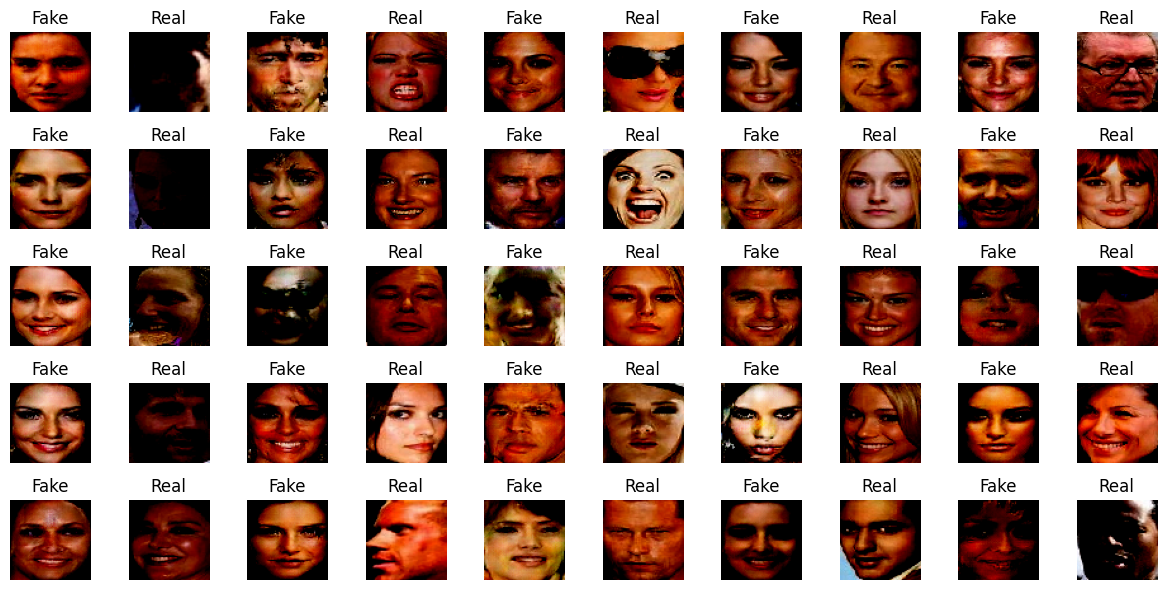

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def plot_real_vs_fake_images(generator, real_images, num_images=25, latent_dim=256):
    # Generate fake images using the generator
    noise = np.random.normal(0, 1, (num_images, latent_dim))
    fake_images = generator.predict(noise)

    # Determine the number of rows and columns for the subplot grid
    num_rows = int(np.ceil(num_images / 5))
    num_cols = min(num_images, 5)

    # Plot real vs. fake images
    fig, axs = plt.subplots(num_rows, num_cols * 2, figsize=(12, 6))
    for i in range(num_rows * num_cols):
        row_index = i // num_cols
        col_index = (i % num_cols) * 2

        # Plot fake image
        if i < len(fake_images):
            ax_fake = axs[row_index, col_index]
            ax_fake.imshow(fake_images[i])
            ax_fake.set_title('Fake')
            ax_fake.axis('off')

        # Plot real image
        if i < len(real_images):
            ax_real = axs[row_index, col_index + 1]
            ax_real.imshow(real_images[i])
            ax_real.set_title('Real')
            ax_real.axis('off')

    plt.tight_layout()
    plt.show()

# Load a batch of real images
real_images_batch = next(data_generator)

# Plot real vs. fake images
plot_real_vs_fake_images(generator, real_images_batch)


2/2 [==============================] - 1s 7ms/step


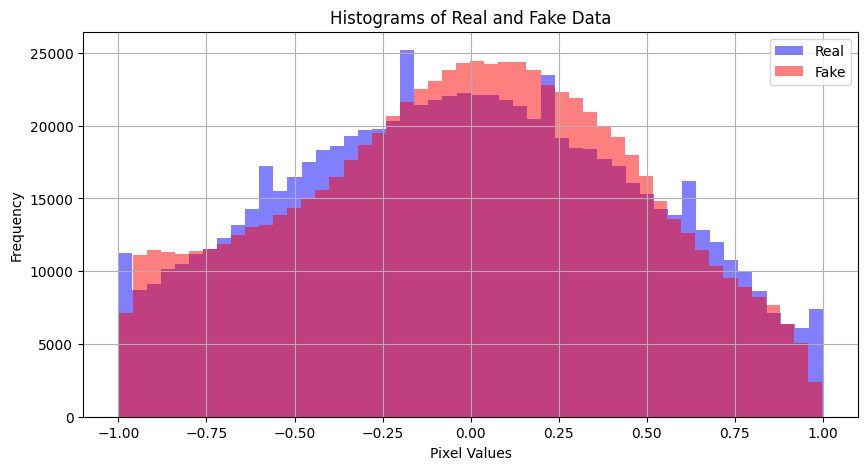

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histograms(real_images, fake_images):
    # Flatten the images to 1D arrays
    real_values = real_images.flatten()
    fake_values = fake_images.flatten()

    # Plot histograms
    plt.figure(figsize=(10, 5))
    plt.hist(real_values, bins=50, color='blue', alpha=0.5, label='Real')
    plt.hist(fake_values, bins=50, color='red', alpha=0.5, label='Fake')
    plt.title('Histograms of Real and Fake Data')
    plt.xlabel('Pixel Values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
# Assuming `real_images_batch` is an array of real images and `generator` is your generator model
num_images = len(real_images_batch)
latent_dim = 256
noise = np.random.normal(0, 1, (num_images, latent_dim))
fake_images = generator.predict(noise)

# Plot histograms
plot_histograms(real_images_batch, fake_images)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Function to generate and save images at different stages of training
def save_generated_images(generator, num_images, latent_dim, save_dir):
    for i in range(num_images):
        # Generate images from random latent vectors
        noise = np.random.normal(0, 1, (1, latent_dim))
        generated_image = generator.predict(noise)

        # Save generated image
        cv2.imwrite(f"{save_dir}/generated_image_{i}.jpg", generated_image)

# Function to interpolate between two points in the latent space and generate images
def interpolate_latent_space(generator, latent_dim, point1, point2, num_steps):
    interpolated_images = []
    for i in range(num_steps):
        # Interpolate between two points in the latent space
        alpha = i / (num_steps - 1)
        interpolated_point = alpha * point1 + (1 - alpha) * point2

        # Generate image from interpolated latent vector
        generated_image = generator.predict(interpolated_point.reshape(1, latent_dim))

        interpolated_images.append(generated_image)

    return interpolated_images

# Example usage
# Assuming `generator` is your trained generator model
# and `latent_dim` is the dimensionality of the latent space
# Generate a random latent vector
latent_dim = 256
latent_vector = np.random.normal(0, 1, (1, latent_dim))

# Generate image from the random latent vector
generated_image = generator.predict(latent_vector)

# Display the generated image
plt.imshow(generated_image.squeeze(), cmap='gray')  # Assuming the image is grayscale
plt.axis('off')
plt.show()